## Different hierarchical composing ideas

In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from src import color_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

from src import hierarchic_blending_operator

In [2]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
size = 10

mu_x_1 = 0
mu_y_1 = 0
mu_variance_x_1 = 3
mu_variance_y_1 = 15
gaussian_1 = ([mu_x_1,mu_y_1],[[mu_variance_x_1,0],[0,mu_variance_y_1]])
mu_x_2 = 3
mu_y_2 = 3
mu_variance_x_2 = 4
mu_variance_y_2 = 4
gaussian_2 = ([mu_x_2,mu_y_2],[[mu_variance_x_2,0.],[0.,mu_variance_y_2]])
mu_x_3 = -2
mu_y_3 = -1
mu_variance_x_3 = 7
mu_variance_y_3 = 7
gaussian_3 = ([mu_x_3,mu_y_3],[[mu_variance_x_3,0.],[0.,mu_variance_y_3]])

In [3]:
X, Y, Z = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_1,size)
X_1, Y_1, Z_1 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_2,size)
X_2, Y_2, Z_2 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_3,size)
Z_color, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,num_of_levels=10,colorscheme_name="PuBu")
Z_color_1, Z_alpha_1 = picture_worker.get_colorgrid(Z_1,color_schemes.matplotlib_colorschemes,num_of_levels=10,colorscheme_name="OrRd")
Z_color_2, Z_alpha_2 = picture_worker.get_colorgrid(Z_2,color_schemes.matplotlib_colorschemes,num_of_levels=10,colorscheme_name="RdPu")

In [5]:
mixed_rgb = picture_worker.combine_two_images(color_blending_operator.porter_duff_source_over, Z_color, Z_color_1,alpha=0.5)

In [6]:
mixed_rgb_max,z_new = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.select_max,Z_color,Z,Z_color_1,Z_1)

In [7]:
mixed_rgb_weighted,z_new = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over,Z_color_1,Z_1,Z_color,Z)

In [8]:
mixed_rgb_quad_weighted,z_new = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over,Z_color_1,Z_1,Z_color,Z)

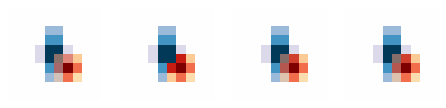

In [9]:
#displays an image
fig, (ax_0, ax_1, ax_2, ax_3) = plt.subplots(1,4)
ax_0.imshow(mixed_rgb)
ax_0.axis("off")
ax_1.imshow(mixed_rgb_max)
ax_1.axis("off")
ax_2.imshow(mixed_rgb_weighted)
ax_2.axis("off")
ax_3.imshow(mixed_rgb_quad_weighted)
ax_3.axis("off")
plt.subplots_adjust(0, 0, 1, 1)
plt.show()

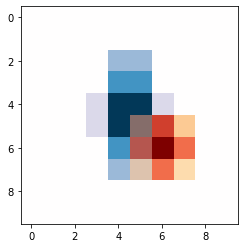

In [10]:
plt.imshow(mixed_rgb_weighted)